# 1.MORO OPTIMIZATION

# 1.1 Generate random policies

In [1]:
from ema_workbench import (Model, MultiprocessingEvaluator, RealParameter, SequentialEvaluator, ScalarOutcome, ema_logging, Constraint, perform_experiments, Policy, load_results)
from ema_workbench.analysis import parcoords
from ema_workbench.em_framework.optimization import (HyperVolume, EpsilonProgress)
from ema_workbench.em_framework import samplers
from problem_formulation import get_model_for_problem_formulation
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
fn = './results_analysis1.tar.gz'
experiments,outcomes = load_results(fn)

In [3]:
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [4]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,92.0,36.627483,1.0,0.717891,286.950920,1.5,0.711619,116.904455,1.5,0.997152,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,0,0,dikesnet
1,129.0,48.135382,10.0,0.174033,315.398612,10.0,0.190892,57.960907,10.0,0.444956,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,1,0,dikesnet
2,105.0,114.005436,1.5,0.497765,117.213436,1.5,0.223015,193.161033,1.0,0.833327,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,2,0,dikesnet
3,79.0,235.431159,1.5,0.971077,32.298769,1.0,0.342229,319.701227,1.5,0.771428,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,3,0,dikesnet
4,121.0,135.055121,1.5,0.112816,299.595954,1.0,0.881769,89.265982,1.0,0.807592,...,1.0,8.0,6.0,6.0,1.0,2.0,3.0,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,102.0,199.190730,1.0,0.146399,221.647121,10.0,0.725807,348.536739,1.0,0.823555,...,10.0,2.0,2.0,2.0,4.0,4.0,0.0,95,99,dikesnet
9996,100.0,31.914259,1.5,0.814719,292.242401,10.0,0.671766,280.246302,1.0,0.347260,...,10.0,2.0,2.0,2.0,4.0,4.0,0.0,96,99,dikesnet
9997,27.0,230.568173,10.0,0.543080,263.174397,10.0,0.616425,335.119685,1.5,0.291768,...,10.0,2.0,2.0,2.0,4.0,4.0,0.0,97,99,dikesnet
9998,63.0,260.157638,1.0,0.402495,320.297261,1.5,0.751741,146.467332,10.0,0.607875,...,10.0,2.0,2.0,2.0,4.0,4.0,0.0,98,99,dikesnet


In [5]:
outcomes

{'A.1_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.1_Dike Investment Costs': array([1.49071579e+08, 1.49071579e+08, 1.49071579e+08, ...,
        2.32328289e+08, 2.32328289e+08, 2.32328289e+08]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2_Expected Annual Damage': array([       0.        ,  7533825.02684883, 19122715.87794481, ...,
               0.        ,        0.        ,        0.        ]),
 'A.2_Dike Investment Costs': array([2.21440566e+08, 2.21440566e+08, 2.21440566e+08, ...,
        2.25454723e+08, 2.25454723e+08, 2.25454723e+08]),
 'A.2_Expected Number of Deaths': array([0.        , 0.00100836, 0.00158466, ..., 0.        , 0.        ,
        0.        ]),
 'A.3_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.3_Dike Investment Costs': array([5.87680987e+07, 5.87680987e+07, 5.87680987e+07, ...,
        1.32114098e+08, 1.32114098e+08, 1.32114098e+08]),
 'A.3_Expected Number of Deaths': array([0., 0., 0.

In [6]:
worst50 = sorted(outcomes['A.3_Dike Investment Costs'])[-50:]
worst50

[185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533,
 185605425.8723533]

In [7]:
experiments.dtypes

A.0_ID flood wave shape     float64
A.1_Bmax                    float64
A.1_Brate                  category
A.1_pfail                   float64
A.2_Bmax                    float64
A.2_Brate                  category
A.2_pfail                   float64
A.3_Bmax                    float64
A.3_Brate                  category
A.3_pfail                   float64
A.4_Bmax                    float64
A.4_Brate                  category
A.4_pfail                   float64
A.5_Bmax                    float64
A.5_Brate                  category
A.5_pfail                   float64
discount rate 0            category
discount rate 1            category
discount rate 2            category
0_RfR 0                     float64
0_RfR 1                     float64
0_RfR 2                     float64
1_RfR 0                     float64
1_RfR 1                     float64
1_RfR 2                     float64
2_RfR 0                     float64
2_RfR 1                     float64
2_RfR 2                     

In [8]:
experiments.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [9]:
experiments_categorical = experiments.select_dtypes(include=pd.CategoricalDtype)
experiments_categorical

,A.1_Brate,A.2_Brate,A.3_Brate,A.4_Brate,A.5_Brate,discount rate 0,discount rate 1,discount rate 2,scenario,policy,model
0,1.0,1.5,1.5,10.0,1.5,2.5,1.5,3.5,0,0,dikesnet
1,10.0,10.0,10.0,1.0,1.0,3.5,2.5,4.5,1,0,dikesnet
2,1.5,1.5,1.0,10.0,1.5,1.5,4.5,4.5,2,0,dikesnet
3,1.5,1.0,1.5,1.5,1.5,4.5,1.5,4.5,3,0,dikesnet
4,1.5,1.0,1.0,10.0,1.5,3.5,1.5,3.5,4,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,10.0,1.0,1.0,1.0,4.5,3.5,3.5,95,99,dikesnet
9996,1.5,10.0,1.0,10.0,1.0,1.5,1.5,3.5,96,99,dikesnet
9997,10.0,10.0,1.5,1.5,1.5,3.5,3.5,3.5,97,99,dikesnet
9998,1.0,1.5,10.0,10.0,1.0,2.5,4.5,1.5,98,99,dikesnet


In [10]:
for column in experiments:
    if column in experiments_categorical:
        experiments.loc[:, str(column)] = experiments.loc[:, str(column)].astype(str)

In [11]:
experiments.dtypes

A.0_ID flood wave shape    float64
A.1_Bmax                   float64
A.1_Brate                   object
A.1_pfail                  float64
A.2_Bmax                   float64
A.2_Brate                   object
A.2_pfail                  float64
A.3_Bmax                   float64
A.3_Brate                   object
A.3_pfail                  float64
A.4_Bmax                   float64
A.4_Brate                   object
A.4_pfail                  float64
A.5_Bmax                   float64
A.5_Brate                   object
A.5_pfail                  float64
discount rate 0             object
discount rate 1             object
discount rate 2             object
0_RfR 0                    float64
0_RfR 1                    float64
0_RfR 2                    float64
1_RfR 0                    float64
1_RfR 1                    float64
1_RfR 2                    float64
2_RfR 0                    float64
2_RfR 1                    float64
2_RfR 2                    float64
3_RfR 0             

In [12]:
policies_t = experiments['policy']
for i, policy in enumerate(np.unique(policies_t)):
    experiments.loc[policies_t==policy, 'policy'] = str(i)

In [13]:
outcomes.keys()

dict_keys(['A.1_Expected Annual Damage', 'A.1_Dike Investment Costs', 'A.1_Expected Number of Deaths', 'A.2_Expected Annual Damage', 'A.2_Dike Investment Costs', 'A.2_Expected Number of Deaths', 'A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'A.4_Expected Annual Damage', 'A.4_Dike Investment Costs', 'A.4_Expected Number of Deaths', 'A.5_Expected Annual Damage', 'A.5_Dike Investment Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])

In [15]:
#from ema_workbench import ema_logging, MultiprocessingEvaluator

#ema_logging.log_to_stderr(ema_logging.INFO)

#with MultiprocessingEvaluator(model) as evaluator:
#    results = evaluator.perform_experiments(scenarios=200,               #500
#                                            policies=4,
#                                            uncertainty_sampling='mc')

In [16]:
keys_A3 = ['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']

outcomes_A3 = {key: outcomes[key] for key in keys_A3}
outcomes_A3

{'A.3_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.3_Dike Investment Costs': array([5.87680987e+07, 5.87680987e+07, 5.87680987e+07, ...,
        1.32114098e+08, 1.32114098e+08, 1.32114098e+08]),
 'A.3_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'RfR Total Costs': array([1.8042e+09, 1.8042e+09, 1.8042e+09, ..., 1.4747e+09, 1.4747e+09,
        1.4747e+09]),
 'Expected Evacuation Costs': array([  0.        , 506.17674906, 994.71781572, ...,   0.        ,
          0.        ,   0.        ])}

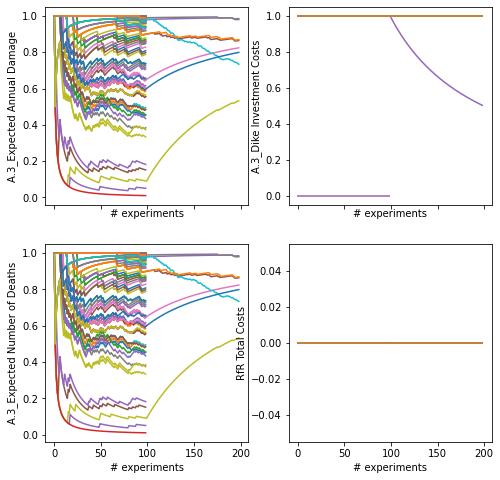

In [17]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8),
                        sharex=True)
axes = [axes[0,0],axes[0,1],axes[1,0],axes[1,1]]                             #axes[1,1]

robustness_funcs = {"A.3_Dike Investment Costs": Dike_Investment_Costs,
                    "A.3_Expected Number of Deaths": Expected_Number_of_Deaths,
                    "A.3_Expected Annual Damage": Expected_Annual_Damage,
                    "RfR Total Costs": RfR_Total_Costs,
                    "Expected Evacuation Costs": Expected_Evacuation_Costs
                   }

for ax, (outcome, value) in zip(axes, outcomes_A3.items()):
    for policy in np.unique(experiments['policy']):
        logical = experiments['policy'] == policy
        data = value[logical]
        robustness = []
      
        for i in range(1, data.shape[0]):
            robustness.append(robustness_funcs[outcome](data[0:i]))
        ax.plot(robustness, label=policy)
    ax.set_xlabel("# experiments")
    ax.set_ylabel(outcome)

# 1.2 Search for candidate solutions

the fundamental problem is fine tuning the robustness functions. To do this, rather than run optimizaitons many times, why not first generate a test set with a bunch of policies, apply robustness functions and visualize the results?

This gives us much faster feedback on reasonble cutoff values. 


In [18]:
from ema_workbench.em_framework import sample_uncertainties
n_scenarios = 10
scenarios = sample_uncertainties(model, n_scenarios)
nfe = int(1000)

NameError: name 'model' is not defined

In [ ]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)


In [ ]:
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenarios,              
                                            policies=100)

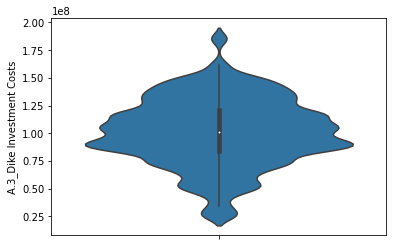

In [19]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
sns.violinplot(data=data, y='A.3_Dike Investment Costs')
plt.show()

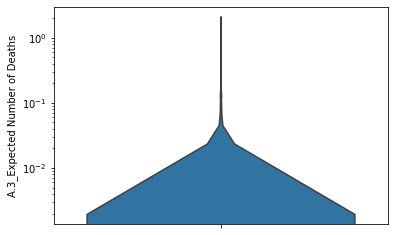

In [22]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='A.3_Expected Number of Deaths')
ax.set_yscale('log')
plt.show()

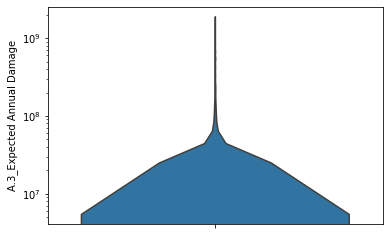

In [21]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='A.3_Expected Annual Damage')
ax.set_yscale('log')
plt.show()

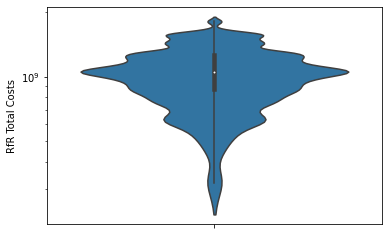

In [25]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='RfR Total Costs')
ax.set_yscale('log')
plt.show()

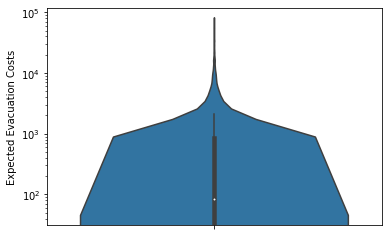

In [24]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Expected Evacuation Costs')
ax.set_yscale('log')
plt.show()

In [35]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

Dike_Investment_Costs = functools.partial(robustness, SMALLER, 100000000)
Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001) #not ok
Expected_Annual_Damage = functools.partial(robustness, SMALLER, 10000000) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
RfR_Total_Costs = functools.partial(robustness, SMALLER, 1000000000)#THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Expected_Evacuation_Costs = functools.partial(robustness, SMALLER, 1000)

MAXIMIZE = ScalarOutcome.MAXIMIZE
MINIMIZE = ScalarOutcome.MINIMIZE
robustness_functions = [ScalarOutcome('A.3_Dike Investment Costs', kind=MAXIMIZE,
                             variable_name='A.3_Dike Investment Costs', function=Dike_Investment_Costs),
                       ScalarOutcome('A.3_Expected Annual Damage', kind=MAXIMIZE,
                             variable_name='A.3_Expected Annual Damage', function=Expected_Annual_Damage),
                       ScalarOutcome('A.3_Expected Number of Deaths', kind=MAXIMIZE,
                             variable_name='A.3_Expected Number of Deaths', function=Expected_Number_of_Deaths),
                       ScalarOutcome('RfR Total Costs', kind=MAXIMIZE,
                             variable_name='RfR Total Costs', function=RfR_Total_Costs),
                       ScalarOutcome('Expected Evacuation Costs', kind=MAXIMIZE,
                             variable_name='Expected Evacuation Costs', function=Expected_Evacuation_Costs)]


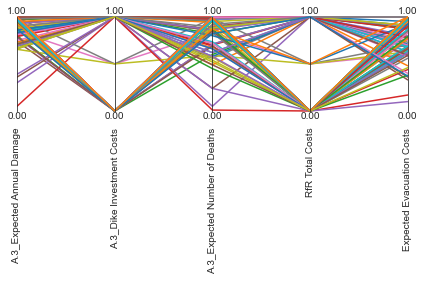

In [38]:
from ema_workbench.analysis import parcoords

funcs ={"A.3_Dike Investment Costs": Dike_Investment_Costs,
                    "A.3_Expected Number of Deaths": Expected_Number_of_Deaths,
                    "A.3_Expected Annual Damage": Expected_Annual_Damage,
                    "RfR Total Costs": RfR_Total_Costs,
                    "Expected Evacuation Costs": Expected_Evacuation_Costs
                   }


total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes_A3.items()}
    
    for k, v in temp_outcomes.items():
        score = funcs[k](v)
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits, fontsize=10)
paraxes.plot(data)
plt.show()

In [37]:
from ema_workbench import (MultiprocessingEvaluator, ema_logging, 
                           perform_experiments, SequentialEvaluator)
from ema_workbench.em_framework.optimization import (HyperVolume, 
                                                     EpsilonProgress)
from ema_workbench.em_framework.evaluators import BaseEvaluator

BaseEvaluator.reporting_frequency = 0.1

ema_logging.log_to_stderr(ema_logging.INFO)

# there is a bit of problem with platypus, so using 1.1. gives 
# cleaner hypervolume results.
convergence = [HyperVolume(minimum=[0,0,0], maximum=[1.1, 1.1, 1.1]),
              EpsilonProgress()]

epsilons=[0.05,]*len(robustness_functions)  #final value of epsilon should be much lower.Just for experiment purposes is 1
with MultiprocessingEvaluator(dike_model) as evaluator:
    archive, convergence = evaluator.robust_optimize(robustness_functions, scenarios,nfe=nfe,
                                                     convergence=convergence, epsilons=epsilons)
    
start = time.time()
end = time.time()

print('Processing time:',(end-start)/60,'Minutes')    

[MainProcess/INFO] pool started
[MainProcess/INFO] terminating pool


NameError: name 'scenarios' is not defined

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

In [ ]:
from ema_workbench.analysis import parcoords

data = archive.loc[:, [o.name for o in robustnes_functions]]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

This is a bit better but not much. 

Now, observe the following: you are using a domain criterion as your sole measure of robustness. That is, you look at the fraction of scenarios above or below a threshold. The costs however do not vary accross scenarios. Thus this objective can only be 0 or 1. This is not particularly useful for optimization. 

We might thus want to consider another metric for costs. Why not simply use the raw costs itself?


In [ ]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

def costs(data):
    return data[0]/1e9 # makes numbers nicer
    
SMALLER = 'SMALLER'

Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 1e-5) #not ok
Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1e4) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Total_Investment_Costs = costs


In [ ]:
from ema_workbench.analysis import parcoords

experiments, outcomes = results

funcs = {'Expected Number of Deaths':Expected_Number_of_Deaths,
         'Expected Annual Damage': Expected_Annual_Damage,
         'Total Investment Costs': Total_Investment_Costs}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
    for k, v in temp_outcomes.items():
        score = funcs[k](v)
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

This already looks much nicer.

In [ ]:
MAXIMIZE = ScalarOutcome.MAXIMIZE
MINIMIZE = ScalarOutcome.MINIMIZE

funcs = {'Expected Number of Deaths':Expected_Number_of_Deaths,
         'Expected Annual Damage': Expected_Annual_Damage,
         'Total Investment Costs': Total_Investment_Costs}

robustnes_functions = [ScalarOutcome('fraction EA deaths', kind=MAXIMIZE, 
                             variable_name='Expected Number of Deaths', function=Expected_Number_of_Deaths),
                       ScalarOutcome('fraction EA damage', kind=MAXIMIZE, 
                             variable_name='Expected Annual Damage', function=Expected_Annual_Damage),
                       ScalarOutcome('investment costs', kind=MINIMIZE, # note that we have to minimize costs!
                             variable_name='Total Investment Costs', function=Total_Investment_Costs)]

In [ ]:
# we have to change the plausible max for total investment costs
convergence = [HyperVolume(minimum=[0,0,0], maximum=[1.1, 1.1, 3]),
              EpsilonProgress()]

epsilons=[0.05,]*len(robustnes_functions)  #final value of epsilon should be much lower.Just for experiment purposes is 1
with MultiprocessingEvaluator(model) as evaluator:
    archive, convergence = evaluator.robust_optimize(robustnes_functions, scenarios, nfe=nfe,
                                                     convergence=convergence, epsilons=epsilons)

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

In [ ]:
data = archive.loc[:, [o.name for o in robustnes_functions]]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

# 1.3 Re-evaluate candidate solutions under uncertainty

In [ ]:
from ema_workbench import Policy

policies = archive.drop([o.name for o in robustnes_functions], axis=1)
policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy("moro {}".format(i), **policy.to_dict()))

In [ ]:
n_scenarios = 1000
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies_to_evaluate)

#start = time.time()
#end = time.time()

#print('Processing time:',(end-start)/60,'Minutes')

In [ ]:
from ema_workbench import save_results

save_results(results, 'MORO_reevaluation.tar.gz')

In [ ]:
policies.to_csv('moro polices.csv')

In [ ]:
import pandas as pd
experiments, outcomes = results

overall_robustness = {}
for policy in np.unique(experiments['policy']):
    policy_robustness = {}

    logical = experiments['policy'] == policy
    
    for outcome, values in outcomes.items():
        values = values[logical]
        policy_robustness[outcome] = robustness_funcs[outcome](values)
    overall_robustness[policy] = policy_robustness
overall_robustness = pd.DataFrame.from_dict(overall_robustness).T
overall_robustness

In [ ]:

data = overall_robustness.loc[:, 
                              ['Expected Number of Deaths', 'Expected Annual Damage', 'Total Investment Costs']]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

In [ ]:
from problem_formulation import get_model_for_problem_formulation

model, planning_steps = get_model_for_problem_formulation(1)

In [ ]:
model

In [ ]:
from ema_workbench import ema_logging, MultiprocessingEvaluator, SequentialEvaluator

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.optimize(nfe=2, searchover='levers',
                                 epsilons=[0.01,]*len(model.outcomes))